# HowLongToBeat - Game Time vs Game Rating

### Initial data loading and manipulation

Import needed libraries for reviewing the scraped data

In [763]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Check the data file

In [764]:
#!cat howlongtobeat_playtimes.csv

Read the data file

In [765]:
pd.read_csv('howlongtobeat_playtimes.csv')

,average_rating,game_description,game_genres,game_id,game_name,game_name_alias,north_america_release_date,rating_count,systems_available,time_to_beat_completionist,...,time_to_beat_completionist_leisure,time_to_beat_completionist_rushed,time_to_beat_main_extras,time_to_beat_main_extras_count,time_to_beat_main_extras_leisure,time_to_beat_main_extras_rushed,time_to_beat_main_story,time_to_beat_main_story_count,time_to_beat_main_story_leisure,time_to_beat_main_story_rushed
0,86.0,BioShock Infinite is a first-person shooter li...,"First-Person, Action, Shooter",1068,\nBioShock Infinite,NaN,"March 26, 2013",3200.0,"PC, Nintendo Switch, PlayStation 3, PlayStatio...",1708.0,...,3696.0,1108.0,975.0,2000.0,1878.0,645.0,710,2900.0,1310,497
1,92.0,Red Dead Redemption 2 is an epic tale of life ...,"Third-Person, Action, Adventure, Open World, S...",27100,\nRed Dead Redemption 2,NaN,"October 26, 2018",1200.0,"Google Stadia, PC, PlayStation 4, Xbox, Xbox One",10150.0,...,16359.0,6871.0,4778.0,1200.0,9363.0,3166.0,2873,619.0,3954,2007
2,82.0,Choose your fate in Assassin's Creed Odyssey.\...,"Third-Person, Action, Open World, Role-Playing",57503,\nAssassin's Creed Odyssey,NaN,"October 04, 2018",730.0,"Google Stadia, PC, PlayStation 4, Xbox, Xbox One",8071.0,...,21232.0,5419.0,4929.0,1000.0,11102.0,3302.0,2488,395.0,3048,1811
3,86.0,You've come here for a reason. The Union Aeros...,"First-Person, Shooter",2708,\nDoom (2016),NaN,"May 13, 2016",1800.0,"PC, Nintendo Switch, PlayStation 4, Xbox One",1602.0,...,3760.0,1101.0,1012.0,1400.0,2489.0,692.0,710,1500.0,1130,470
4,87.0,"Portal is a new single player game from Valve,...","First-Person, Platform, Puzzle",7230,\nPortal,NaN,"October 09, 2007",2900.0,"PC, PlayStation 3, Xbox, Xbox 360, Xbox One",592.0,...,2113.0,313.0,323.0,949.0,849.0,185.0,195,3600.0,513,108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3866,65.0,Starkiller returns with over-the-top Force pow...,Action,9136,\nStar Wars: The Force Unleashed II,NaN,"October 26, 2010",313.0,"Nintendo DS, PC, PlayStation 3, Wii, Xbox 360,...",736.0,...,1054.0,514.0,466.0,83.0,1421.0,311.0,327,282.0,477,219
3867,82.0,The game's twisty plot leads our naive hero on...,"Point-and-Click, Adventure",10162,\nThe Secret of Monkey Island,The Secret of Monkey Island: Special Edition,October 1990,353.0,"Amiga, Mobile, PC, PlayStation 3, Sega CD, Xbo...",432.0,...,603.0,333.0,443.0,79.0,579.0,324.0,395,333.0,1007,251
3868,76.0,"PS2 action game with a dark, gothic look that ...","Action, Adventure, Hack and Slash",2496,\nDevil May Cry,NaN,"October 16, 2001",542.0,"Nintendo Switch, PC, PlayStation, PlayStation ...",953.0,...,1713.0,655.0,542.0,117.0,1155.0,364.0,379,443.0,634,260
3869,74.0,Lego Harry Potter: Years 5-7 is an Action-Adve...,"Action, Adventure",5251,\nLEGO Harry Potter: Years 5-7,NaN,"November 11, 2011",156.0,"Mobile, PC, Nintendo 3DS, Nintendo DS, Nintend...",1507.0,...,2101.0,1058.0,1027.0,44.0,1404.0,764.0,672,68.0,933,457


Read data file to a dataframe for manipulation

In [766]:
hltb_df = pd.read_csv('howlongtobeat_playtimes.csv')

Check the new variable

In [767]:
#hltb_df

In [768]:
# hltb_df.loc[17]

In [769]:
print(np.sum(hltb_df.isnull(), axis=0))

average_rating                           0
game_description                        84
game_genres                            197
game_id                                  0
game_name                                0
game_name_alias                       3245
north_america_release_date              66
rating_count                             0
systems_available                        0
time_to_beat_completionist             112
time_to_beat_completionist_count       112
time_to_beat_completionist_leisure     112
time_to_beat_completionist_rushed      112
time_to_beat_main_extras                34
time_to_beat_main_extras_count          34
time_to_beat_main_extras_leisure        34
time_to_beat_main_extras_rushed         34
time_to_beat_main_story                  0
time_to_beat_main_story_count            0
time_to_beat_main_story_leisure          0
time_to_beat_main_story_rushed           0
dtype: int64


Split the games across all tagged genres

In [770]:
hltb_df_splitgenres = hltb_df.copy()
hltb_df_splitgenres.dropna(subset=['game_genres'], inplace=True)
hltb_df_splitgenres.index = range(len(hltb_df_splitgenres.index))
# hltb_df_splitgenres.head(20)

In [771]:
hltb_df_splitgenres['game_genres'] = hltb_df_splitgenres['game_genres'].apply(lambda x: x.split(', '))

In [772]:
# i keeps tracks of index
index=0
# save [index, genre] in a nested list
list_ = []
for item in hltb_df_splitgenres['game_genres']:
    list_.extend(map(lambda x: [index, x.lower()], item))
    index += 1
genre = pd.DataFrame(list_, columns=['index', 'genres'])
# genre.head()
#df_genre.genres

In [773]:
# genre[genre['genres'] == 'visual novel']

# hltb_df_splitgenres

Only review genres with at least 10 entries

In [774]:
genre = genre.groupby('genres').filter(lambda x : len(x)>10)
# for rw in genre.groupby('genres'):
#     print(rw[0])

In [775]:
hltb_df_splitgenres = pd.merge(hltb_df_splitgenres.drop('game_genres', axis=1), genre, how='right', left_index=True, right_on='index')
# hltb_df_splitgenres.head()

### Start looking at the scraped data

Check some basic info across all genres

(7385, 22)


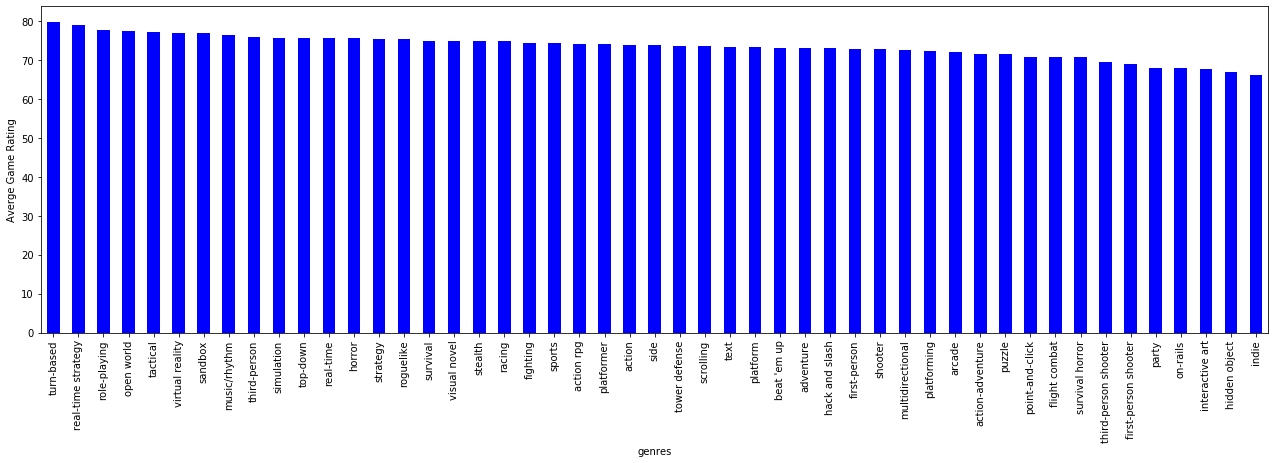

In [776]:
plt.figure(figsize=(22,6))
hltb_df_splitgenres.groupby('genres')['average_rating'].mean().sort_values(ascending=False).plot.bar(color='b')
plt.ylabel('Averge Game Rating')
print(hltb_df_splitgenres.shape)

In [777]:
hltb_df_splitgenres[['time_to_beat_main_story', 'average_rating']].corr()

,time_to_beat_main_story,average_rating
time_to_beat_main_story,1.000000,0.456902
average_rating,0.456902,1.000000


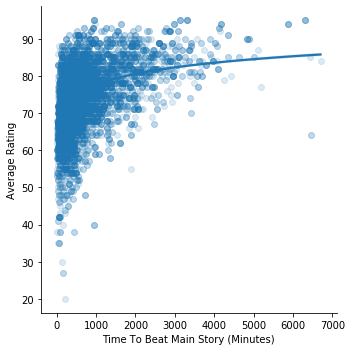

In [778]:
sns.lmplot("time_to_beat_main_story", "average_rating", hltb_df_splitgenres, logx=True, scatter_kws={'alpha':0.15}).set_axis_labels("Time To Beat Main Story (Minutes)", "Average Rating")


Look at time versus rating split by play style

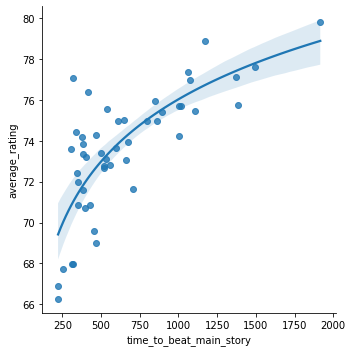

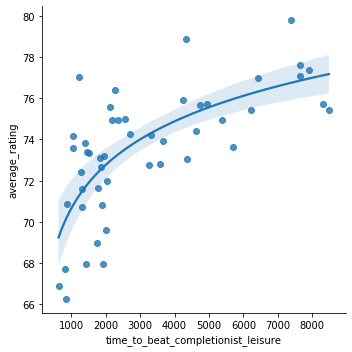

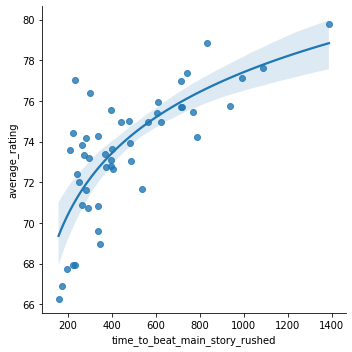

In [779]:
hltb_df_groupby_genre = hltb_df_splitgenres.groupby('genres').agg('mean')

sns.lmplot("time_to_beat_main_story", "average_rating", hltb_df_groupby_genre, logx=True)
sns.lmplot("time_to_beat_completionist_leisure", "average_rating", hltb_df_groupby_genre, logx=True)
sns.lmplot("time_to_beat_main_story_rushed", "average_rating", hltb_df_groupby_genre, logx=True)


Check correlation between play time and average rating for different genres and play styles

Only need one set of correlation values

In [780]:
hltb_df_ttb_ms = hltb_df_splitgenres.groupby('genres')[['time_to_beat_main_story', 'average_rating']] \
    .corr().iloc[range(1,96,2),:-1].dropna()

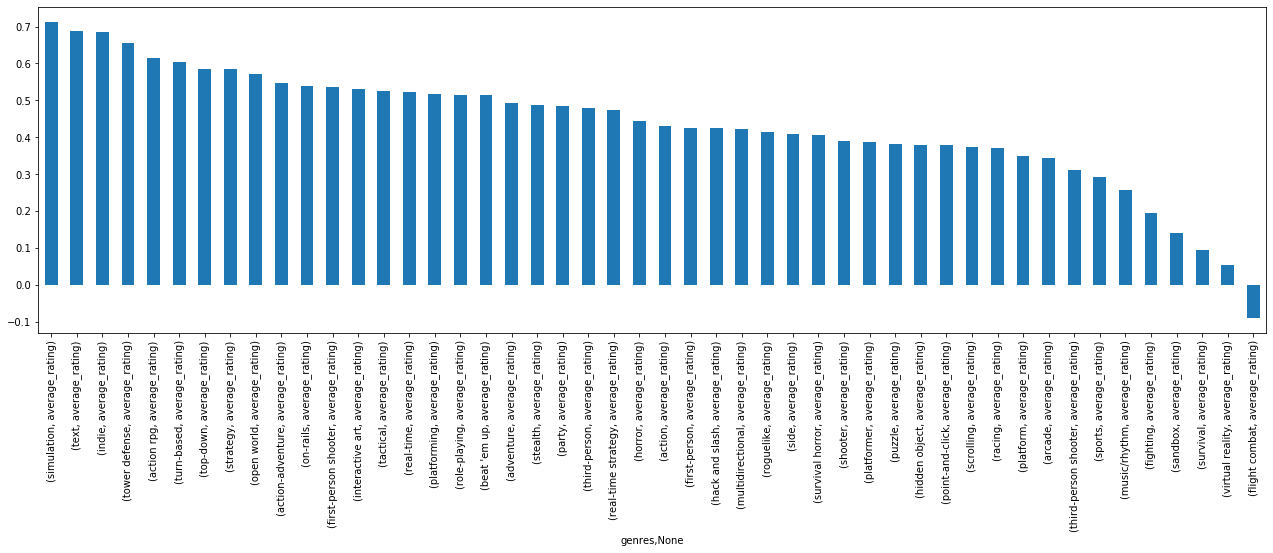

In [781]:
# Main Story - Average

plt.figure(figsize=(22,6))
hltb_df_ttb_ms['time_to_beat_main_story'].sort_values(ascending=False).plot.bar()

In [782]:
# hltb_df_ttb_c

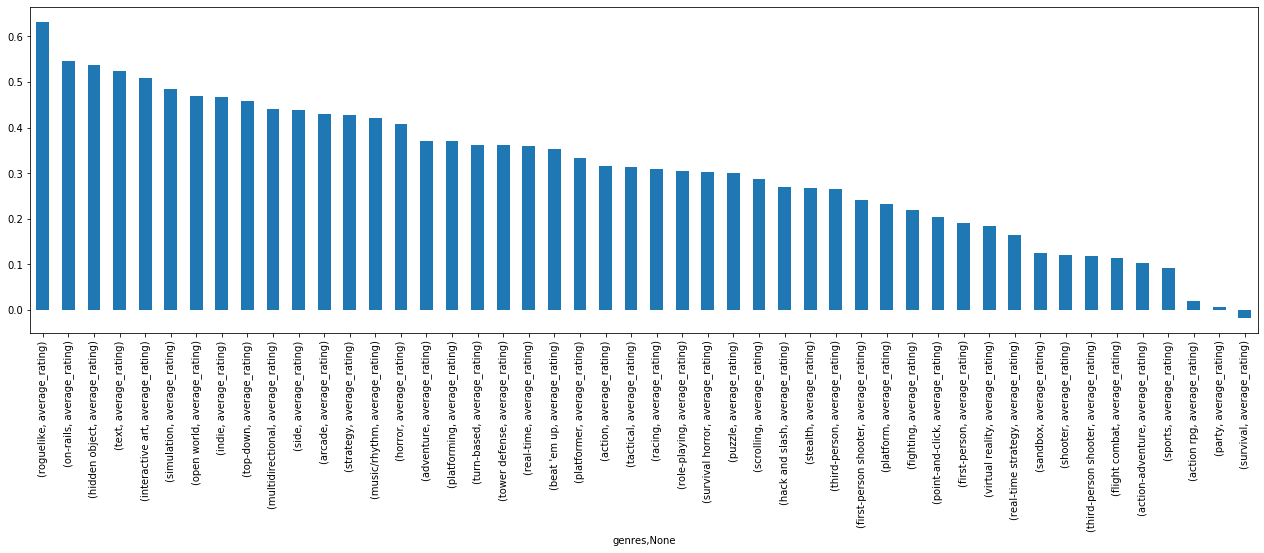

In [783]:
# Completionist - Average

hltb_df_ttb_c = hltb_df_splitgenres.copy()
hltb_df_ttb_c.dropna(subset=['time_to_beat_completionist'], inplace=True)

hltb_df_ttb_c = hltb_df_ttb_c.groupby('genres')[['time_to_beat_completionist', 'average_rating']] \
    .corr().iloc[range(1,96,2),:-1].dropna()

plt.figure(figsize=(22,6))
hltb_df_ttb_c['time_to_beat_completionist'].sort_values(ascending=False).plot.bar()

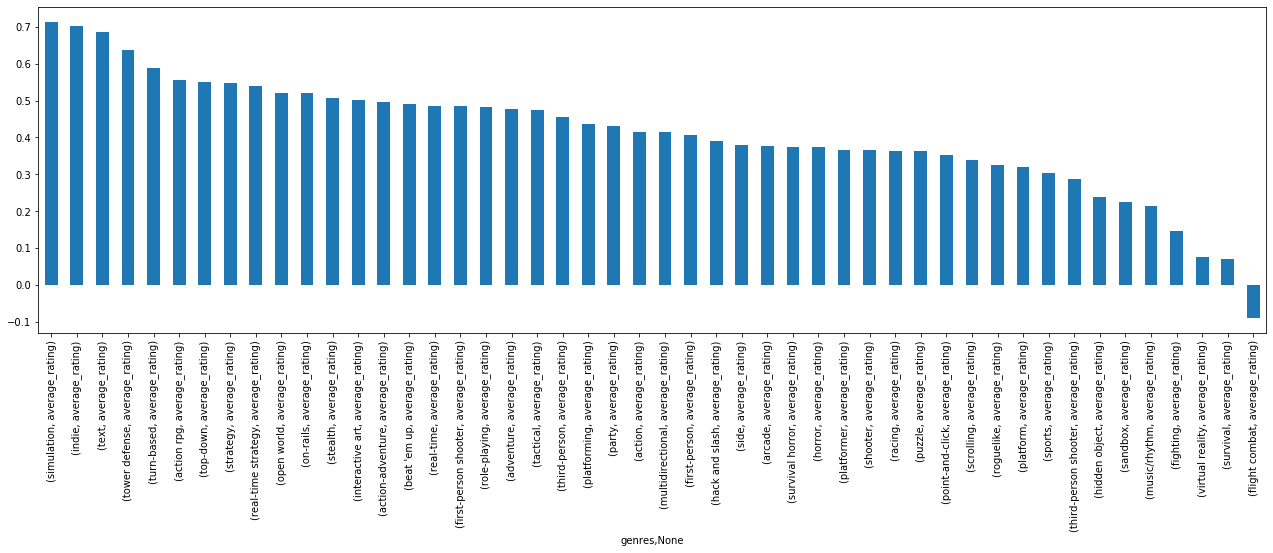

In [784]:
# Main Story - Rushed

hltb_df_ttb_ms_r = hltb_df_splitgenres.copy()
hltb_df_ttb_ms_r.dropna(subset=['time_to_beat_main_story_rushed'], inplace=True)

hltb_df_ttb_ms_r = hltb_df_ttb_ms_r.groupby('genres')[['time_to_beat_main_story_rushed', 'average_rating']] \
    .corr().iloc[range(1,96,2),:-1].dropna()

plt.figure(figsize=(22,6))
hltb_df_ttb_ms_r['time_to_beat_main_story_rushed'].sort_values(ascending=False).plot.bar()

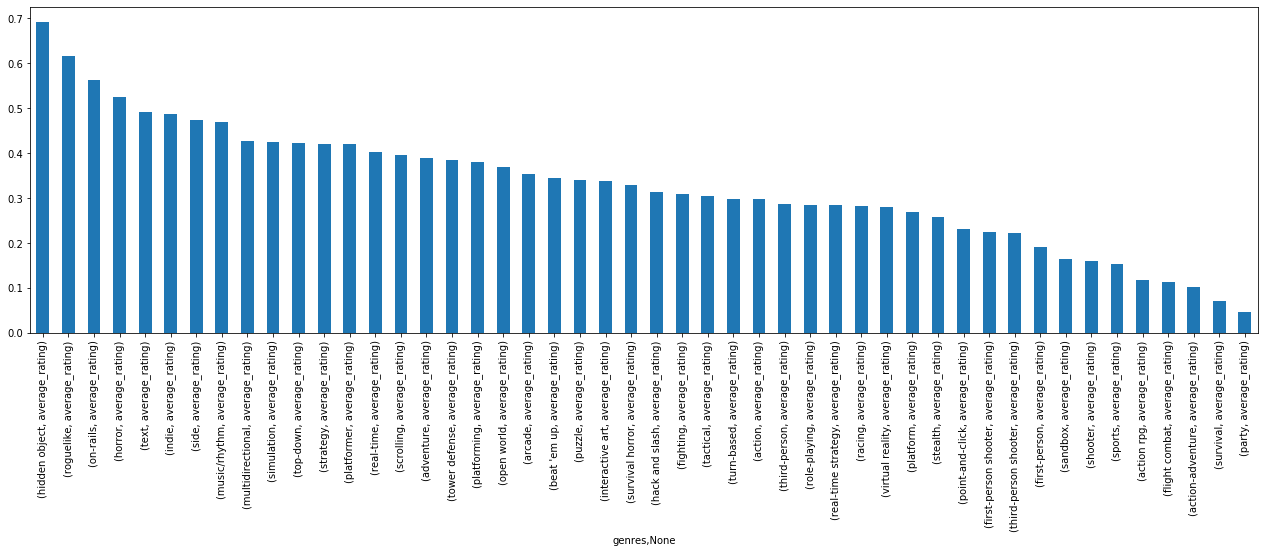

In [785]:
# Completionist - Leisure

hltb_df_ttb_c_l = hltb_df_splitgenres.copy()
hltb_df_ttb_c_l.dropna(subset=['time_to_beat_completionist_leisure'], inplace=True)

hltb_df_ttb_c_l = hltb_df_ttb_c_l.groupby('genres')[['time_to_beat_completionist_leisure', 'average_rating']] \
    .corr().iloc[range(1,96,2),:-1].dropna()

plt.figure(figsize=(22,6))
hltb_df_ttb_c_l['time_to_beat_completionist_leisure'].sort_values(ascending=False).plot.bar()

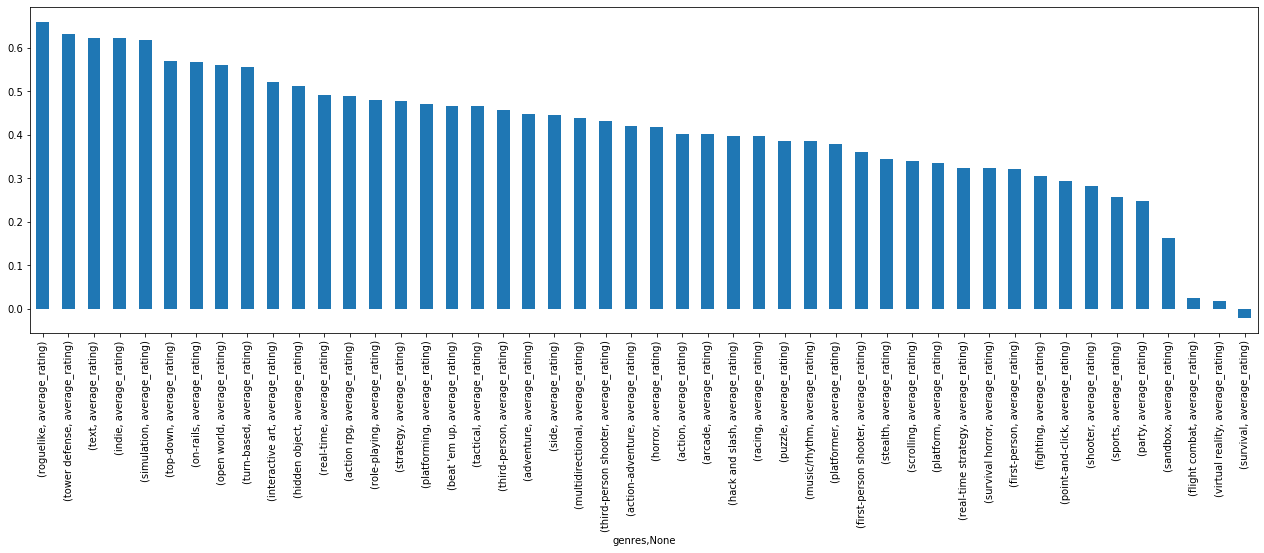

In [786]:
# Main + Extras - Average

hltb_df_ttb_me = hltb_df_splitgenres.copy()
hltb_df_ttb_me.dropna(subset=['time_to_beat_main_extras'], inplace=True)

hltb_df_ttb_me = hltb_df_ttb_me.groupby('genres')[['time_to_beat_main_extras', 'average_rating']] \
    .corr().iloc[range(1,96,2),:-1].dropna()

plt.figure(figsize=(22,6))
hltb_df_ttb_me['time_to_beat_main_extras'].sort_values(ascending=False).plot.bar()

Check genres counts by game

In [787]:
hltb_df_genrecount = hltb_df.copy()
hltb_df_genrecount.dropna(subset=['game_genres'], inplace=True)
hltb_df_genrecount.index = range(len(hltb_df_genrecount.index))
hltb_df_genrecount['game_genres'] = hltb_df_genrecount['game_genres'].apply(lambda x: len(x.split(', ')))

hltb_df_genrecount.head(5)

,average_rating,game_description,game_genres,game_id,game_name,game_name_alias,north_america_release_date,rating_count,systems_available,time_to_beat_completionist,...,time_to_beat_completionist_leisure,time_to_beat_completionist_rushed,time_to_beat_main_extras,time_to_beat_main_extras_count,time_to_beat_main_extras_leisure,time_to_beat_main_extras_rushed,time_to_beat_main_story,time_to_beat_main_story_count,time_to_beat_main_story_leisure,time_to_beat_main_story_rushed
0,86.0,BioShock Infinite is a first-person shooter li...,3,1068,\nBioShock Infinite,NaN,"March 26, 2013",3200.0,"PC, Nintendo Switch, PlayStation 3, PlayStatio...",1708.0,...,3696.0,1108.0,975.0,2000.0,1878.0,645.0,710,2900.0,1310,497
1,92.0,Red Dead Redemption 2 is an epic tale of life ...,5,27100,\nRed Dead Redemption 2,NaN,"October 26, 2018",1200.0,"Google Stadia, PC, PlayStation 4, Xbox, Xbox One",10150.0,...,16359.0,6871.0,4778.0,1200.0,9363.0,3166.0,2873,619.0,3954,2007
2,82.0,Choose your fate in Assassin's Creed Odyssey.\...,4,57503,\nAssassin's Creed Odyssey,NaN,"October 04, 2018",730.0,"Google Stadia, PC, PlayStation 4, Xbox, Xbox One",8071.0,...,21232.0,5419.0,4929.0,1000.0,11102.0,3302.0,2488,395.0,3048,1811
3,86.0,You've come here for a reason. The Union Aeros...,2,2708,\nDoom (2016),NaN,"May 13, 2016",1800.0,"PC, Nintendo Switch, PlayStation 4, Xbox One",1602.0,...,3760.0,1101.0,1012.0,1400.0,2489.0,692.0,710,1500.0,1130,470
4,87.0,"Portal is a new single player game from Valve,...",3,7230,\nPortal,NaN,"October 09, 2007",2900.0,"PC, PlayStation 3, Xbox, Xbox 360, Xbox One",592.0,...,2113.0,313.0,323.0,949.0,849.0,185.0,195,3600.0,513,108


In [788]:
# Main + Extras - Average

# hltb_df_ttb_me = hltb_df_splitgenres.copy()
# hltb_df_ttb_me.dropna(subset=['time_to_beat_main_extras'], inplace=True)

# hltb_df_genrecount['game_genres'].sort_values(ascending=False)

# plt.figure(figsize=(22,6))
# hltb_df_ttb_me['time_to_beat_main_extras'].sort_values(ascending=False).plot.bar()

hltb_df_genrecount.groupby('game_genres').agg('mean')

,average_rating,game_id,rating_count,time_to_beat_completionist,time_to_beat_completionist_count,time_to_beat_completionist_leisure,time_to_beat_completionist_rushed,time_to_beat_main_extras,time_to_beat_main_extras_count,time_to_beat_main_extras_leisure,time_to_beat_main_extras_rushed,time_to_beat_main_story,time_to_beat_main_story_count,time_to_beat_main_story_leisure,time_to_beat_main_story_rushed
game_genres,,,,,,,,,,,,,,,
1,72.928994,15731.294379,106.644231,1964.597084,25.678434,2926.392939,1449.845741,1008.032234,41.180660,1730.416042,710.332084,629.064349,67.250000,917.813609,457.979290
2,73.182648,18008.958143,147.028919,2220.021824,35.208106,3487.169135,1598.108340,1069.295420,67.687786,1881.492366,741.492366,671.937595,104.961187,990.996956,483.707002
3,74.072664,19550.444637,218.690311,2254.598566,48.105735,3624.342294,1618.283154,1139.321678,113.328671,2056.763986,798.269231,731.498270,149.809689,1061.020761,530.264706
4,75.902878,20367.097122,346.705036,2245.856115,86.906475,4148.960432,1589.643885,1280.496403,232.129496,2508.978417,867.539568,823.935252,219.248201,1242.960432,585.381295
5,76.269231,22404.480769,337.807692,2410.009901,86.069307,4313.950495,1715.029703,1380.163462,228.019231,2576.548077,934.019231,853.634615,222.884615,1303.259615,591.682692
6,79.705882,19359.264706,526.764706,3138.647059,98.382353,6186.382353,2132.205882,1747.676471,345.735294,4173.294118,1107.617647,979.117647,331.882353,1594.235294,678.882353
7,72.500000,23763.625000,228.875000,1800.250000,58.750000,2811.125000,1287.875000,988.000000,140.250000,1802.125000,644.500000,577.750000,125.000000,835.000000,422.750000
8,77.333333,26254.666667,118.000000,3598.000000,16.333333,5728.333333,2694.000000,2044.000000,117.666667,3348.666667,1502.000000,1497.000000,48.666667,1954.666667,1164.000000
9,70.000000,22299.000000,62.000000,1306.000000,9.500000,1563.000000,1090.500000,1102.000000,30.000000,1472.500000,835.500000,938.500000,43.000000,1082.500000,800.000000


In [789]:
hltb_df_genrecount.iloc[1585,:]

average_rating                                                                       85
game_description                      Players take on the role of a hunter and are s...
game_genres                                                                           2
game_id                                                                            6147
game_name                                                  \nMonster Hunter 3 Ultimate 
game_name_alias                                                    Monster Hunter Tri G
north_america_release_date                                               March 19, 2013
rating_count                                                                        114
systems_available                                              Nintendo 3DS, Wii, Wii U
time_to_beat_completionist                                                        40250
time_to_beat_completionist_count                                                     16
time_to_beat_completionist_leisu

### Start plotting specific genre data that I need

Start plotting play time versus average rating for different play styles and genres

In [790]:
import seaborn as sns

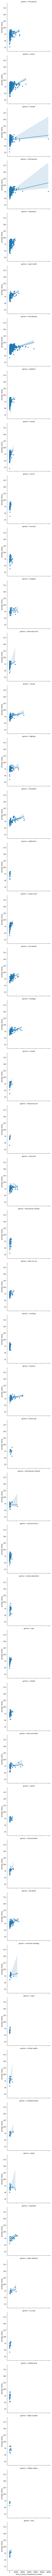

In [791]:
# hltb_df_splitgenres.groupby('genres')[['time_to_beat_main_story', 'average_rating']].corr()
# sns.lmplot("genres", "time_to_beat_main_story", hltb_df_ttb_ms)
sns.lmplot("time_to_beat_completionist_rushed", "average_rating", hltb_df_splitgenres, row='genres')


Pull out specific plots from above to use in presentation

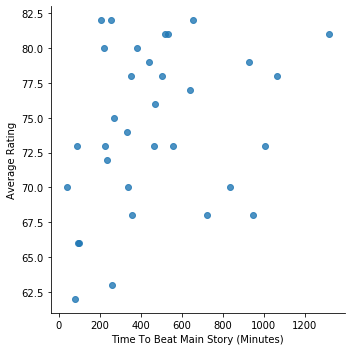

In [792]:
sns.lmplot("time_to_beat_main_story", "average_rating", hltb_df_splitgenres.loc[hltb_df_splitgenres['genres'] == 'sports'], logx=False, fit_reg=False).set_axis_labels("Time To Beat Main Story (Minutes)", "Average Rating")
# sns.lmplot("time_to_beat_completionist_leisure", "average_rating", hltb_df_splitgenres.loc[hltb_df_splitgenres['genres'] == 'music/rhythm'], row='genres', fit_reg=False)
# sns.lmplot("time_to_beat_main_story", "average_rating", hltb_df_splitgenres.loc[hltb_df_splitgenres['genres'] == 'roguelike'], row='genres', logx=True)


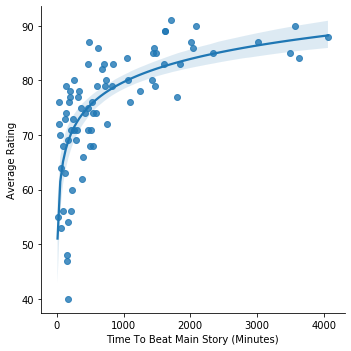

In [793]:
#Visual Novel

sns.lmplot("time_to_beat_main_story", "average_rating", hltb_df_splitgenres.loc[hltb_df_splitgenres['genres'] == 'visual novel'], logx=True).set_axis_labels("Time To Beat Main Story (Minutes)", "Average Rating")



Check play time versus rating for a single genre across all play styles

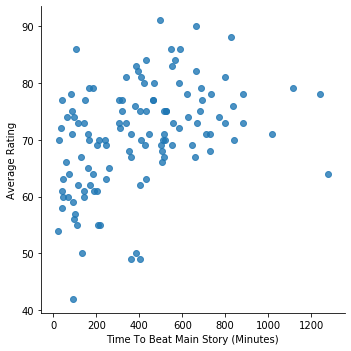

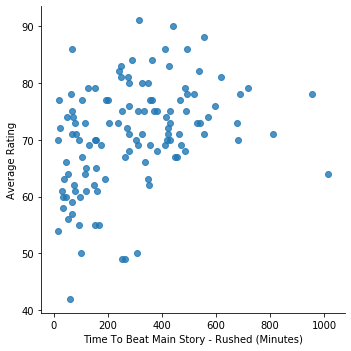

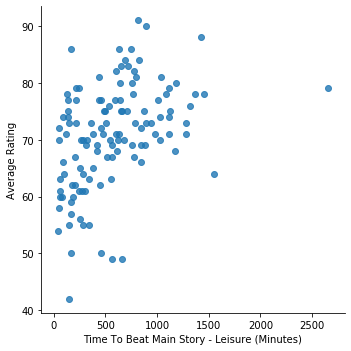

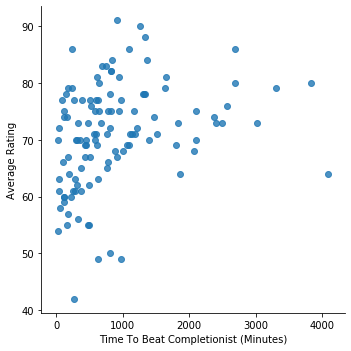

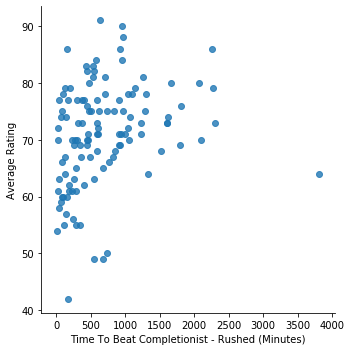

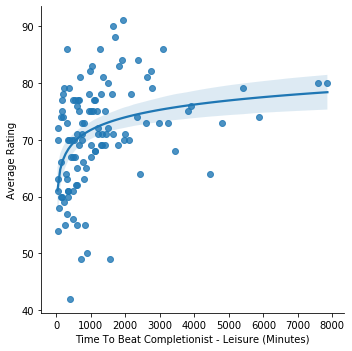

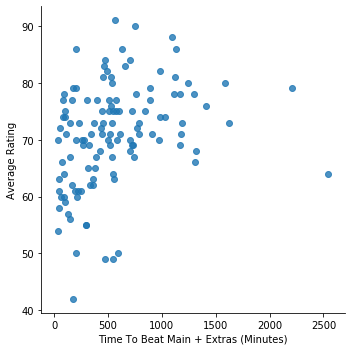

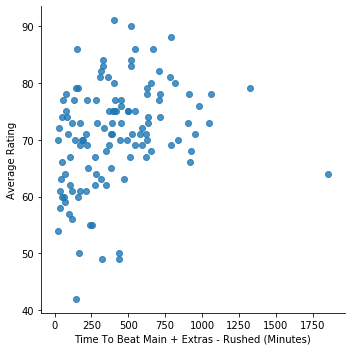

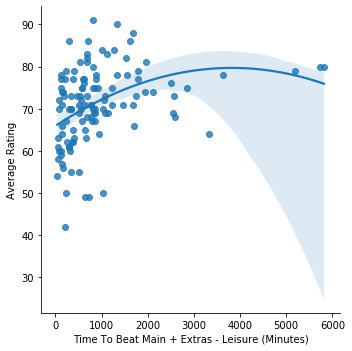

In [794]:
temp_genre = 'survival horror'
use_logx = False
use_fit_line = False
order_num = 2

sns.lmplot("time_to_beat_main_story", "average_rating", hltb_df_splitgenres.loc[hltb_df_splitgenres['genres'] == temp_genre], logx=use_logx, fit_reg=use_fit_line).set_axis_labels("Time To Beat Main Story (Minutes)", "Average Rating")
sns.lmplot("time_to_beat_main_story_rushed", "average_rating", hltb_df_splitgenres.loc[hltb_df_splitgenres['genres'] == temp_genre], logx=use_logx, fit_reg=use_fit_line).set_axis_labels("Time To Beat Main Story - Rushed (Minutes)", "Average Rating")
sns.lmplot("time_to_beat_main_story_leisure", "average_rating", hltb_df_splitgenres.loc[hltb_df_splitgenres['genres'] == temp_genre], logx=use_logx, fit_reg=use_fit_line).set_axis_labels("Time To Beat Main Story - Leisure (Minutes)", "Average Rating")
sns.lmplot("time_to_beat_completionist", "average_rating", hltb_df_splitgenres.loc[hltb_df_splitgenres['genres'] == temp_genre], logx=use_logx, fit_reg=use_fit_line).set_axis_labels("Time To Beat Completionist (Minutes)", "Average Rating")
sns.lmplot("time_to_beat_completionist_rushed", "average_rating", hltb_df_splitgenres.loc[hltb_df_splitgenres['genres'] == temp_genre], logx=use_logx, fit_reg=use_fit_line).set_axis_labels("Time To Beat Completionist - Rushed (Minutes)", "Average Rating")
sns.lmplot("time_to_beat_completionist_leisure", "average_rating", hltb_df_splitgenres.loc[hltb_df_splitgenres['genres'] == temp_genre], logx=True, fit_reg=True).set_axis_labels("Time To Beat Completionist - Leisure (Minutes)", "Average Rating")
sns.lmplot("time_to_beat_main_extras", "average_rating", hltb_df_splitgenres.loc[hltb_df_splitgenres['genres'] == temp_genre], logx=use_logx, fit_reg=use_fit_line).set_axis_labels("Time To Beat Main + Extras (Minutes)", "Average Rating")
sns.lmplot("time_to_beat_main_extras_rushed", "average_rating", hltb_df_splitgenres.loc[hltb_df_splitgenres['genres'] == temp_genre], logx=use_logx, fit_reg=use_fit_line).set_axis_labels("Time To Beat Main + Extras - Rushed (Minutes)", "Average Rating")
sns.lmplot("time_to_beat_main_extras_leisure", "average_rating", hltb_df_splitgenres.loc[hltb_df_splitgenres['genres'] == temp_genre], logx=use_logx, fit_reg=True, order=2).set_axis_labels("Time To Beat Main + Extras - Leisure (Minutes)", "Average Rating")


In [795]:
import scipy as sp

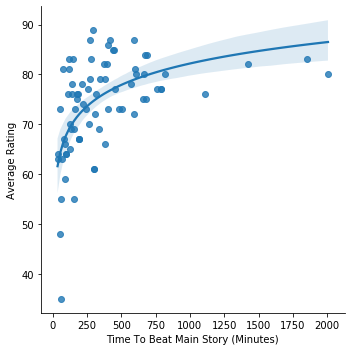

In [796]:
# Side

sns.lmplot("time_to_beat_main_story", "average_rating", hltb_df_splitgenres.loc[hltb_df_splitgenres['genres'] == 'side'], logx=True).set_axis_labels("Time To Beat Main Story (Minutes)", "Average Rating")



### Start sentiment analysis for game descriptions

Start plotting sentiment analysis for presentation

In [797]:
from textblob import TextBlob

In [798]:
def sentiment_func(x):
    sentiment = TextBlob(x['game_description'])
    x['polarity'] = sentiment.polarity
    x['subjectivity'] = sentiment.subjectivity
    return x

[Text(0, 0.5, 'Average Rating'),
 Text(0.5, 0, 'Polarity'),
 Text(0.5, 1.0, 'Sentiment Analysis')]

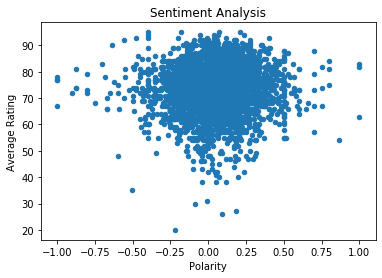

In [799]:
# sample_full = hltb_df.dropna(subset=['game_description'], inplace=False).apply(sentiment_func, axis=1)
sample_full.plot.scatter('polarity', 'average_rating').set(xlabel="Polarity", ylabel="Average Rating", title='Sentiment Analysis')


In [800]:
sample = hltb_df_splitgenres.dropna(subset=['game_description'], inplace=False).apply(sentiment_func, axis=1)

Split sentiment analysis by genre

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


genres
action                  AxesSubplot(0.125,0.125;0.775x0.755)
action rpg              AxesSubplot(0.125,0.125;0.775x0.755)
action-adventure        AxesSubplot(0.125,0.125;0.775x0.755)
adventure               AxesSubplot(0.125,0.125;0.775x0.755)
arcade                  AxesSubplot(0.125,0.125;0.775x0.755)
beat 'em up             AxesSubplot(0.125,0.125;0.775x0.755)
fighting                AxesSubplot(0.125,0.125;0.775x0.755)
first-person            AxesSubplot(0.125,0.125;0.775x0.755)
first-person shooter    AxesSubplot(0.125,0.125;0.775x0.755)
flight combat           AxesSubplot(0.125,0.125;0.775x0.755)
hack and slash          AxesSubplot(0.125,0.125;0.775x0.755)
hidden object           AxesSubplot(0.125,0.125;0.775x0.755)
horror                  AxesSubplot(0.125,0.125;0.775x0.755)
indie                   AxesSubplot(0.125,0.125;0.775x0.755)
interactive art         AxesSubplot(0.125,0.125;0.775x0.755)
multidirectional        AxesSubplot(0.125,0.125;0.775x0.755)
music/rhythm     

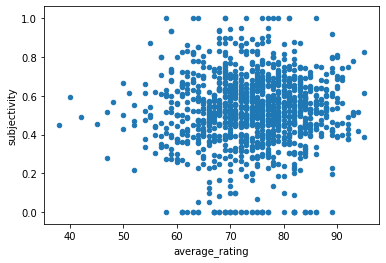

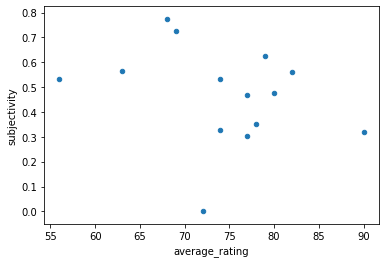

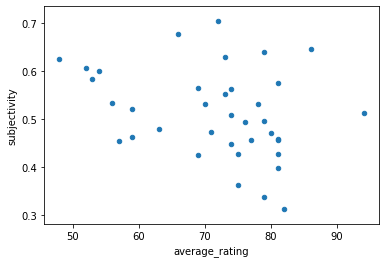

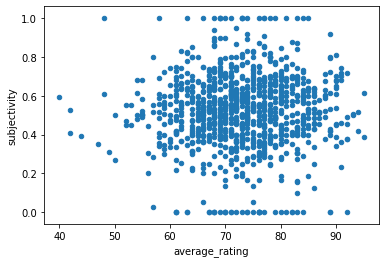

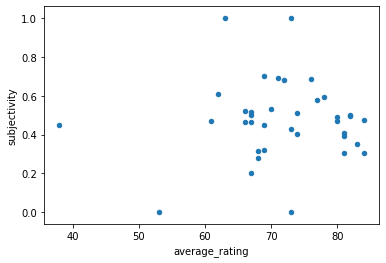

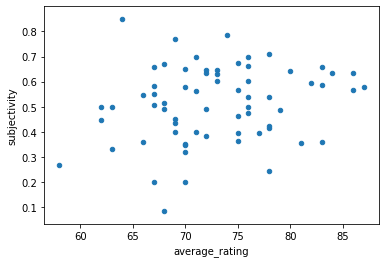

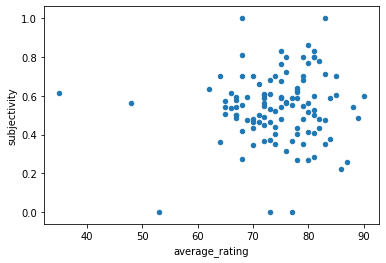

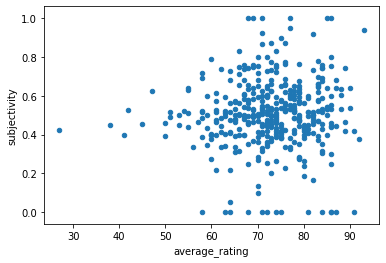

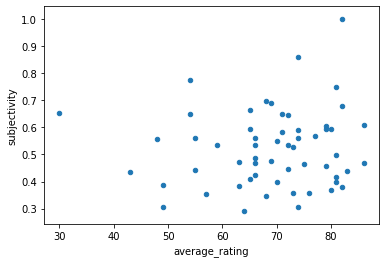

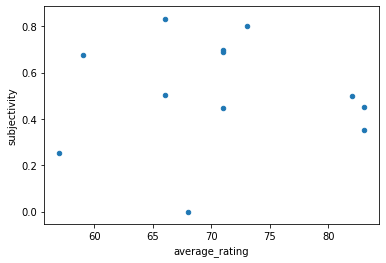

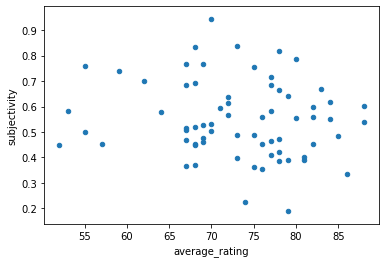

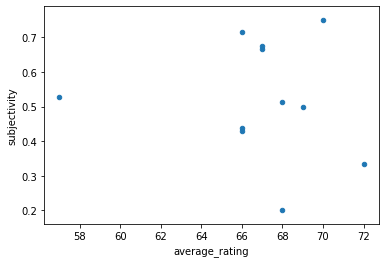

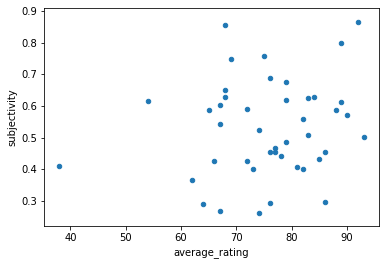

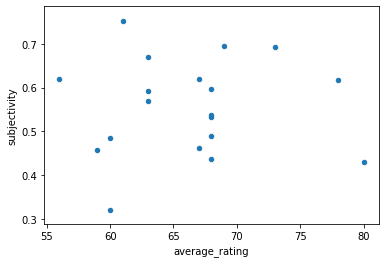

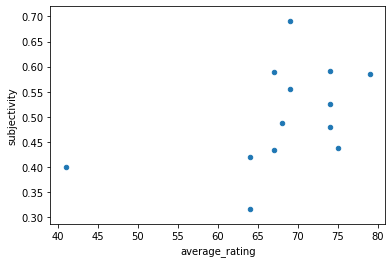

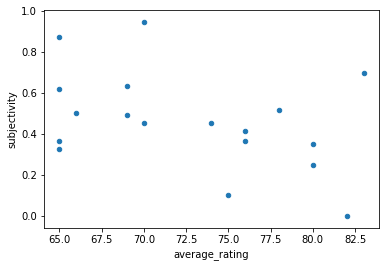

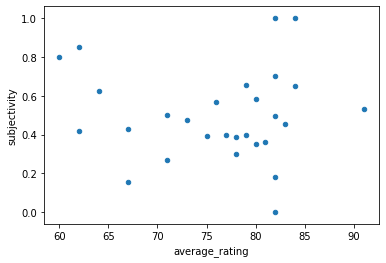

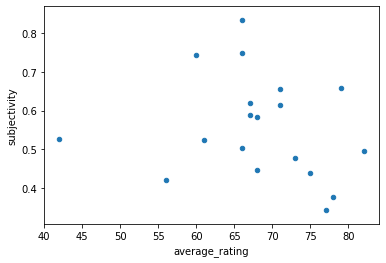

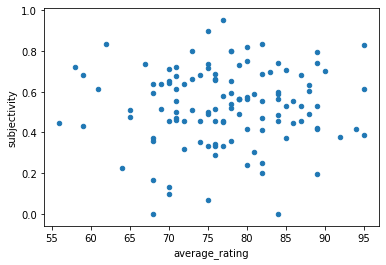

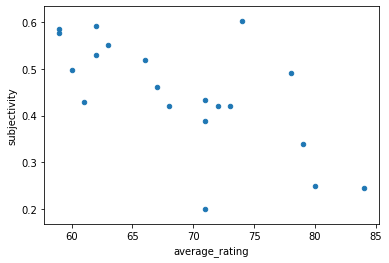

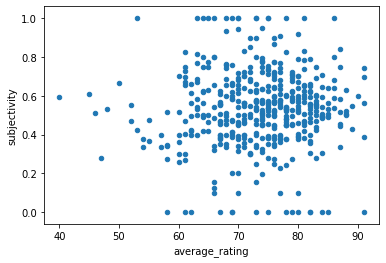

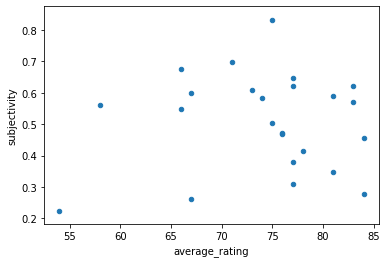

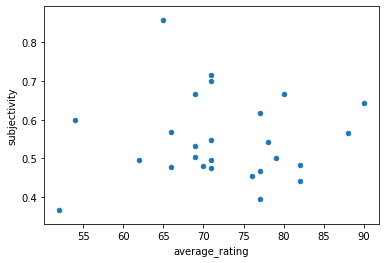

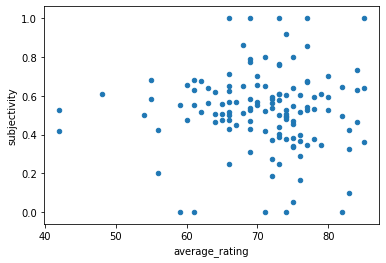

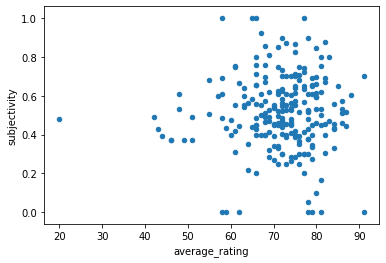

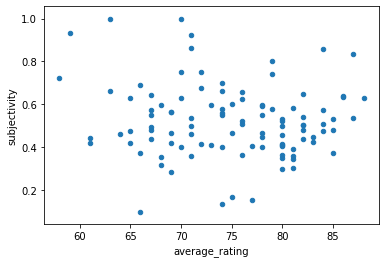

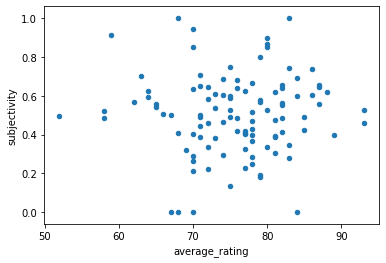

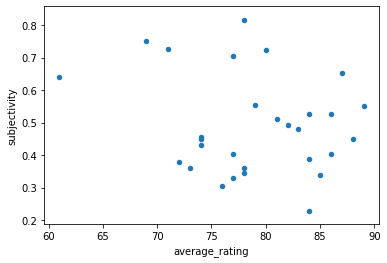

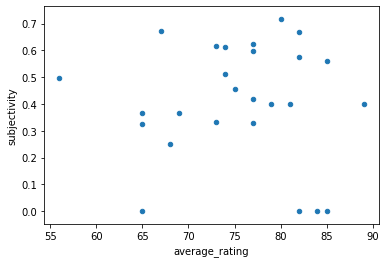

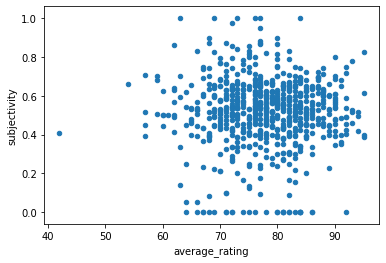

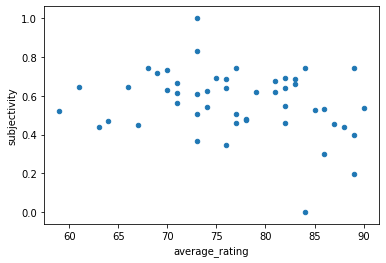

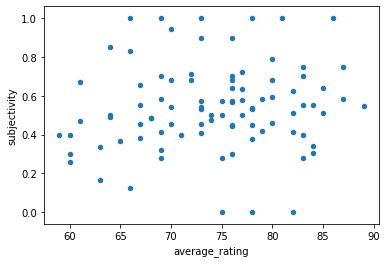

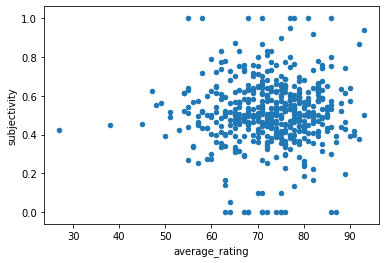

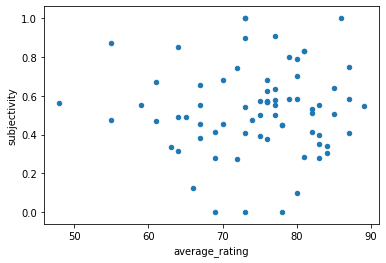

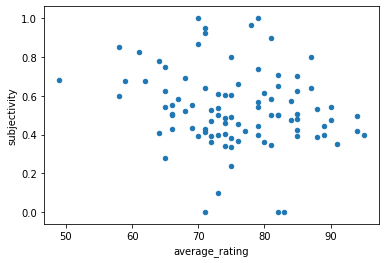

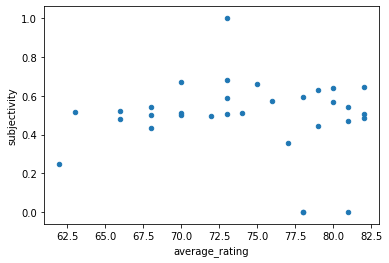

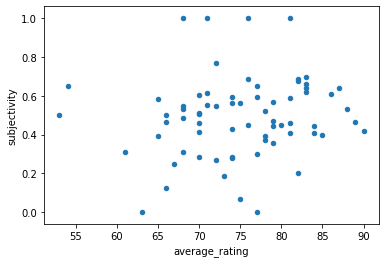

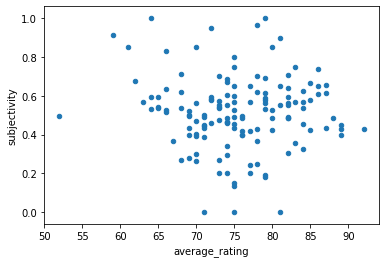

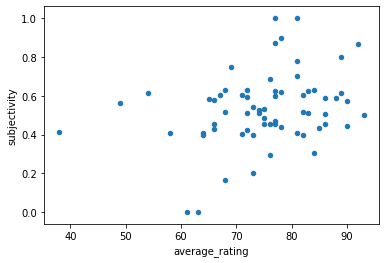

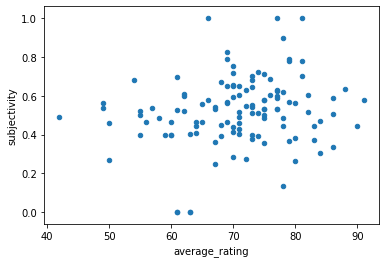

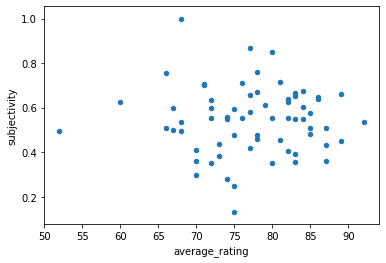

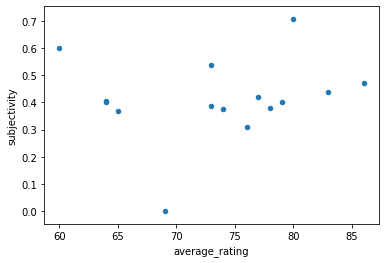

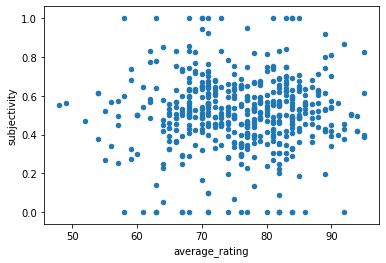

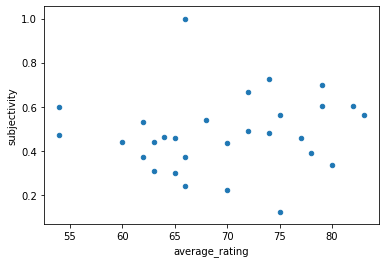

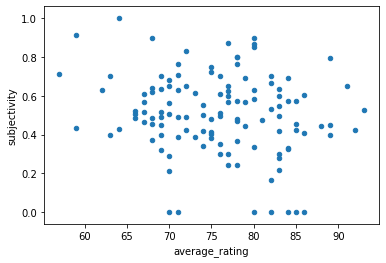

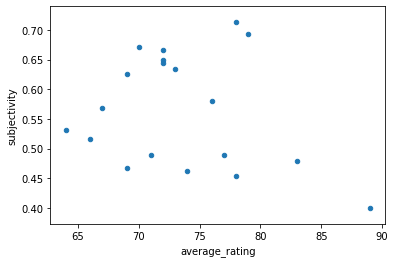

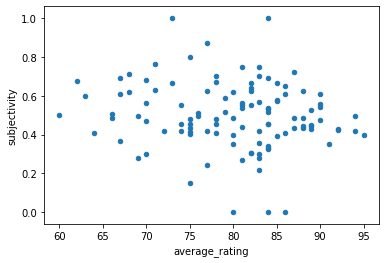

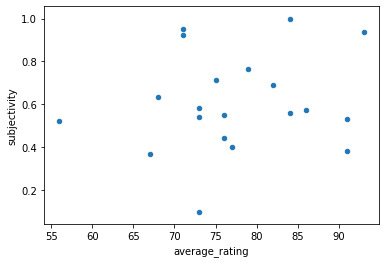

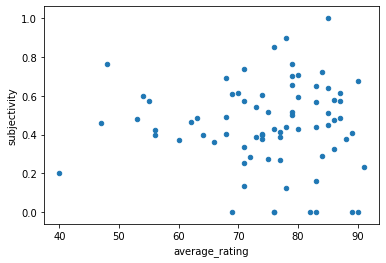

In [801]:
sample.groupby('genres').plot.scatter('average_rating', 'subjectivity')

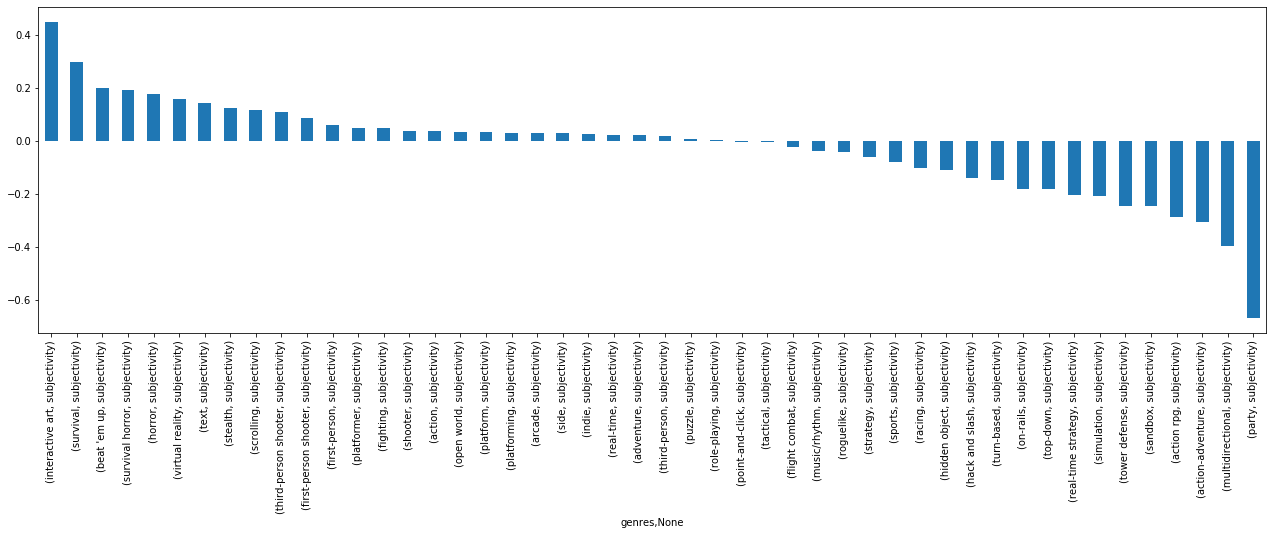

In [802]:
sample_pol_rating = sample.groupby('genres')[['average_rating', 'subjectivity']].corr().iloc[range(1,96,2),:-1].dropna()

# hltb_df_ttb_c_l = hltb_df_ttb_c_l.groupby('genres')[['time_to_beat_completionist_leisure', 'average_rating']] \
#     .corr().iloc[range(1,96,2),:-1].dropna()

plt.figure(figsize=(22,6))
sample_pol_rating['average_rating'].sort_values(ascending=False).plot.bar()


Text(0.5, 1, 'Party')

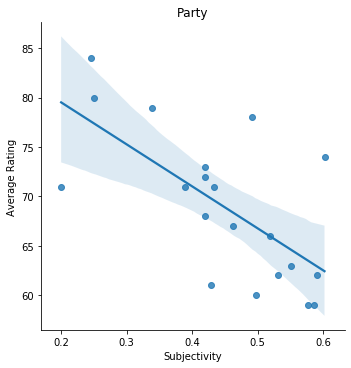

In [803]:
sns.lmplot("subjectivity", "average_rating", sample.loc[sample['genres'] == 'party'], order=1).set_axis_labels("Subjectivity", "Average Rating")
plt.title('Party')
# plt.ylim(50, 100)

In [804]:
sample.loc[sample['genres'] == 'party']

,average_rating,game_description,game_id,game_name,game_name_alias,north_america_release_date,rating_count,systems_available,time_to_beat_completionist,time_to_beat_completionist_count,...,time_to_beat_main_extras_leisure,time_to_beat_main_extras_rushed,time_to_beat_main_story,time_to_beat_main_story_count,time_to_beat_main_story_leisure,time_to_beat_main_story_rushed,index,genres,polarity,subjectivity
458,62.0,Super Monkey Ball 3D is a unique Action-Party ...,9398,\nSuper Monkey Ball 3D,NaN,"March 27, 2011",15.0,Nintendo 3DS,390.0,1.0,...,286.0,260.0,142,23.0,305,93,227,party,0.142183,0.530762
829,61.0,Grab your friends and family and captain the c...,5649,\nMario Party 9,NaN,"March 11, 2012",47.0,Wii,9000.0,1.0,...,1898.0,578.0,301,16.0,364,265,420,party,0.081061,0.428535
1410,59.0,You can crash the party as bad guy Bowser in M...,19214,\nMario Party 10,NaN,"March 20, 2015",50.0,Wii U,1310.0,3.0,...,1410.0,515.0,210,18.0,277,114,737,party,-0.441667,0.577778
1472,71.0,Crash Bash was the first in the party genre fo...,1976,\nCrash Bash,NaN,"November 06, 2000",70.0,"PlayStation, PlayStation 2",633.0,12.0,...,503.0,383.0,370,28.0,452,325,769,party,0.125000,0.200000
1522,84.0,"With 150 new game stages, Super Monkey Ball 2 ...",9397,\nSuper Monkey Ball 2,NaN,"August 25, 2002",45.0,Nintendo GameCube,816.0,3.0,...,1144.0,879.0,325,25.0,430,197,796,party,0.017541,0.244901
1538,62.0,Wario and friends are bringing new ways to pla...,11741,\nGame & Wario,NaN,"June 23, 2013",41.0,Wii U,749.0,4.0,...,717.0,221.0,124,27.0,181,94,806,party,0.275682,0.590909
1615,80.0,Mario is back with more mini-games and improve...,5642,\nMario Party 2,NaN,"January 24, 2000",94.0,"Nintendo 64, Wii, Wii U",1620.0,10.0,...,804.0,594.0,428,21.0,572,380,848,party,0.250000,0.250000
1616,74.0,Mario Party 5 bring party-game fans a new coll...,5645,\nMario Party 5,NaN,"November 10, 2003",59.0,Nintendo GameCube,1384.0,5.0,...,1039.0,679.0,645,15.0,941,381,849,party,0.568182,0.602273
1913,68.0,The world's most popular party video game is g...,5648,\nMario Party 8,NaN,"May 29, 2007",106.0,Wii,615.0,5.0,...,2777.0,857.0,266,19.0,337,187,1005,party,0.120000,0.420000
2057,73.0,Mario and his friends return for a fun-filled ...,5641,\nMario Party,NaN,"February 08, 1999",98.0,Nintendo 64,1461.0,11.0,...,1097.0,717.0,567,32.0,876,426,1080,party,0.253114,0.419817


Text(0.5, 1, 'Polarity < -0.7')

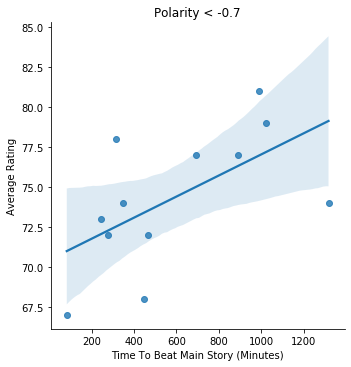

In [805]:
sns.lmplot("time_to_beat_main_story", "average_rating", sample_full[sample_full['polarity'] < -.7]).set_axis_labels("Time To Beat Main Story (Minutes)", "Average Rating")
plt.title('Polarity < -0.7')
# plt.xlim(0, 2500)
# plt.ylim(60, 90)

In [806]:
sample_full[sample_full['polarity'] < -.7]

,average_rating,game_description,game_genres,game_id,game_name,game_name_alias,north_america_release_date,rating_count,systems_available,time_to_beat_completionist,...,time_to_beat_main_extras,time_to_beat_main_extras_count,time_to_beat_main_extras_leisure,time_to_beat_main_extras_rushed,time_to_beat_main_story,time_to_beat_main_story_count,time_to_beat_main_story_leisure,time_to_beat_main_story_rushed,polarity,subjectivity
784,79.0,Instead of discreet units that attack your bas...,"Simulation, Strategy",18182,\nCreeper World 3: Arc Eternal,NaN,"March 27, 2014",17.0,PC,11293.0,...,1859.0,15.0,3989.0,1079.0,1020,19.0,1245,795,-0.800,1.00
1291,67.0,Use blazing speed to save the animals from The...,NaN,8786,\nSonic the Hedgehog (8-bit),NaN,"October 25, 1991",60.0,"Nintendo GameCube, PlayStation 2, Sega Game Ge...",90.0,...,68.0,3.0,74.0,61.0,83,38.0,130,60,-1.000,1.00
1644,78.0,Use the Quarp Drive teleport to outsmart the e...,"Scrolling, Platform, Shooter",20803,\nVelocity 2X,NaN,"September 02, 2014",78.0,"Nintendo Switch, PC, PlayStation 4, PlayStatio...",1646.0,...,587.0,19.0,961.0,403.0,314,54.0,397,260,-1.000,1.00
1796,68.0,By harnessing the destructive power of the Fou...,Platform,1975,\nCrash Bandicoot: The Wrath of Cortex,NaN,"October 29, 2001",121.0,"Nintendo GameCube, PlayStation, PlayStation 2,...",727.0,...,562.0,13.0,751.0,461.0,448,40.0,686,345,-0.750,0.60
1826,72.0,"Acquire, train, upgrade, and whip your brutish...",Strategy,45944,\nDomina,NaN,"April 03, 2017",38.0,PC,948.0,...,510.0,15.0,847.0,397.0,276,27.0,489,183,-0.900,0.95
2284,74.0,Beneath a Steel Sky you take the role of Rober...,Adventure,1005,\nBeneath a Steel Sky,NaN,March 1994,77.0,"Amiga, Mobile, PC",432.0,...,400.0,13.0,502.0,343.0,349,52.0,462,246,-0.875,1.00
2390,72.0,Don the Power Suit of Samus Aran--an intergala...,"Action, Adventure",5948,\nMetroid,Classic NES Series: Metroid,"August 15, 1987",198.0,"Game Boy Advance, NES, Nintendo 3DS, Nintendo ...",520.0,...,437.0,56.0,861.0,260.0,465,79.0,1061,296,-0.800,0.95
2443,77.0,Triumph over evil with the hand you're dealt!,"Adventure, Role-Playing",66603,\nSteamWorld Quest: Hand of Gilgamech,NaN,"April 25, 2019",72.0,"Google Stadia, PC, Nintendo Switch",1488.0,...,1180.0,58.0,1591.0,878.0,890,60.0,1367,677,-1.000,1.00
2748,77.0,Take the role of Claire Redfield as she battle...,"Survival, Survival Horror",7727,\nResident Evil Code: Veronica X,Biohazard Code: Veronica X,"February 29, 2000",183.0,"Dreamcast, Nintendo GameCube, PlayStation 2, P...",981.0,...,894.0,37.0,1783.0,711.0,694,135.0,1012,465,-1.000,1.00
2808,74.0,"In a bid to survive, explore the sprawling, de...",NaN,67880,\nThe Surge 2,NaN,"September 24, 2019",49.0,"PC, PlayStation 4, Xbox One",2247.0,...,1550.0,67.0,2102.0,1127.0,1317,18.0,1491,1131,-0.875,1.00


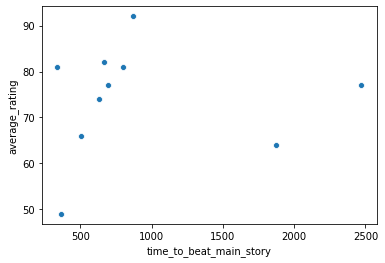

In [807]:
sns.scatterplot(x="time_to_beat_main_story", y="average_rating", data=sample.dropna(subset=['polarity'])[(sample['polarity'] < -.3) & (sample['genres'] == 'survival')])

# sample.dropna(subset=['polarity'])[(sample['polarity'] < -.3) & (sample['genres'] == 'horror')]

